# Introduction
Analytic Report project: Given the dataset (TMDB Movie dataset), create an analytic report to answer three required questions
# List of contents
## I. Import library & read data
## II. Explore data
## III. Answer 3 questions
---

## I. Import library & read data
- Import pandas: use to read, store, process, explore, visualize data
- Read csv file 'tmdb_5000_movies.csv'
- Show 5 sample of dataset

In [1]:
import pandas as pd
data = pd.read_csv('tmdb_5000_movies.csv')
pd.set_option('display.max_columns',0) # show all columns
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## II. Explore data
- Number of (row, columns)
- Data type of columns
- Describe values of each columns thought statistic indicator: count, unique, top, freq, mean, std, min, max, 25%, 50%, 75%

In [2]:
print('Data shape:', data.shape)
print('Data type:\n', data.dtypes)
data.describe(include='all')

Data shape: (4803, 20)
Data type:
 budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,NaN,[],en,Out of the Blue,A scheming raccoon fools a mismatched family o...,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


- Number of missing values each column

In [3]:
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

- Remove missing value rows of overview, release_date, runtime (because it take only 4 rows in 4803 rows)
- Don't remove of homepage, tagline columns because most of its values is unique. Can consider null as default value

In [4]:
data = data.dropna(subset=['overview', 'release_date', 'runtime'])
data.shape

(4799, 20)

- Data processing:
    - convert string list to list
    - convert string date to date

In [5]:
import ast
data['l_genres'] =  [[list(j.values())[-1] for j in ast.literal_eval(i)] for i in data.genres.values]
data['l_production_countries'] = [[list(j.values())[-1] for j in ast.literal_eval(i)] for i in data.production_countries.values]
data['d_release_date'] = pd.to_datetime(data.release_date)
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,l_genres,l_production_countries,d_release_date
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[United States of America, United Kingdom]",2009-12-10
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]",[United States of America],2007-05-19
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[United Kingdom, United States of America]",2015-10-26
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]",[United States of America],2012-07-16
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",[United States of America],2012-03-07


## III. Answer 3 questions
### Q1. What areas have the most influence on revenue?
- Get revenue, production_countries columns from data
- Slit list of countries to each country with revenue = revenue / number country in list
- Calculate sum, mean of revenue group by country
- Plot bar chart

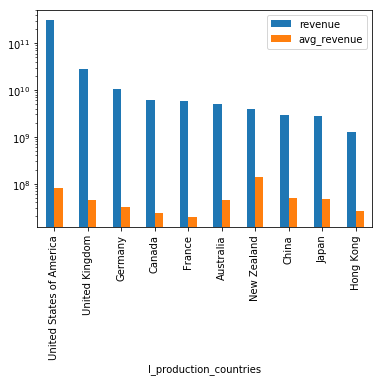

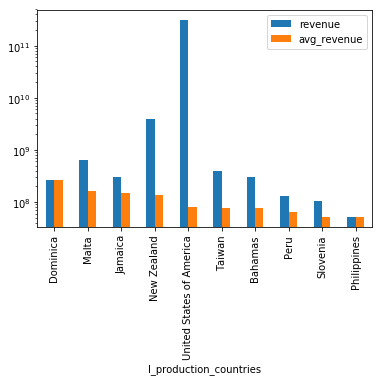

In [11]:
a = pd.DataFrame([[j, data.revenue[i]/len(data.l_production_countries[i])] for i in data.index for j in data.l_production_countries[i]], columns=['l_production_countries', 'revenue'])
a1 = a.groupby('l_production_countries').sum()
a1['avg_revenue'] = a.groupby('l_production_countries').mean()
a1.sort_values(by='revenue', ascending=False)[0:10].plot(y = ['revenue', 'avg_revenue'], kind = 'bar', logy = True)
a1.sort_values(by='avg_revenue', ascending=False)[0:10].plot(y = ['revenue', 'avg_revenue'], kind = 'bar', logy = True)

### Conclusion: 
- United States of America has the highest total revenue
- Dominica has the highest average revenue

### T-test
- Do t-test on US revenue set
- Hypothesis (H0): average revenue in US set = average revenue in all country --> single sample t-test

In [7]:
US_revenue = a[a.l_production_countries == 'United States of America']
mean_revenue = data.revenue.mean()
mean_US_revenue = US_revenue.revenue.mean()
std_US_revenue = US_revenue.revenue.std()
n_sample = len(US_revenue.index)
t_value = (mean_US_revenue - mean_revenue) / (std_US_revenue / (n_sample**(0.5)))
print(t_value)

# Retest use scipy
from scipy import stats
stats.ttest_1samp(US_revenue.revenue, mean_revenue)

-0.8318327446781919


Ttest_1sampResult(statistic=-0.8318327446781856, pvalue=0.40555357851116514)

### Conclusion:
- pvalue = 0.40555357851116514 > 0.05 --> No reject H0

### Q2. How is a movie’s revenue and average score affected by its genre?
- Get genre, revenue, vote_average columns from data
- Slit list of genres to each genre has revenue and vote_average similar with the revenue, vote_average of list of genres
- Calculate mean of revenue, vote_average group by genre
- Plot bar chart

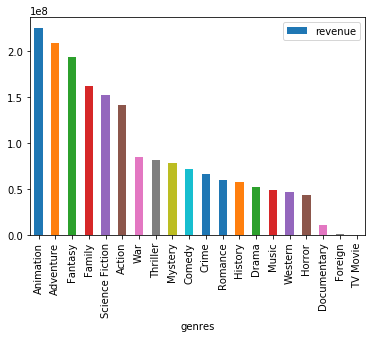

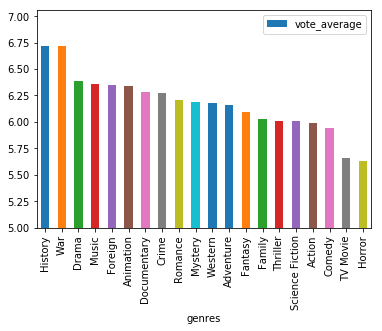

In [8]:
b = pd.DataFrame([[j, data.revenue[i], data.vote_average[i]] for i in data.index for j in data.l_genres[i]], columns=['genres', 'revenue', 'vote_average'])
b1 = b.groupby('genres').mean()
b1.sort_values(by='revenue',ascending=False).plot(y = 'revenue', kind = 'bar')
b1.sort_values(by='vote_average',ascending=False).plot(y = 'vote_average', kind = 'bar', ylim = [int(b1.vote_average.min()), None])


### Conclusion: 
- Animation, Adventure, Fantasy genre has the highest average revenue
- History, War, Drama has the highest average vote

### Calculate correlation between vote_average and revenue

In [9]:
b2 = data[['revenue', 'vote_average']].copy()
b2.corr()

,revenue,vote_average
revenue,1.000000,0.197437
vote_average,0.197437,1.000000


### Conclusion: 
r = 0.197437 --> low correlation

### Q3. What influence does release date have on revenue?
- Get release_date, revenue columns from data
- Slit list of release_date to day, month, year columns
- Calculate mean, sum of revenue group by day/month, month, year
- Plot charts

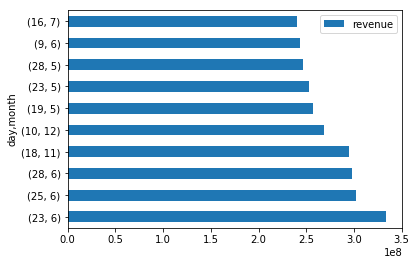

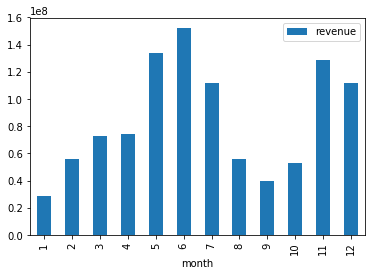

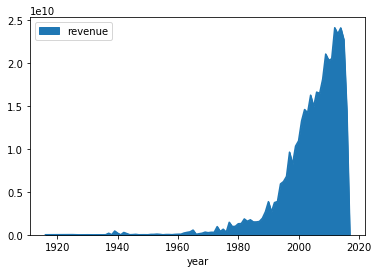

In [10]:
c = data[['d_release_date', 'revenue']].copy()
c['day'] = c.d_release_date.dt.day
c['month'] = c.d_release_date.dt.month
c['year'] = c.d_release_date.dt.year
c1 = c[['day', 'month', 'revenue']].groupby(by = ['day', 'month']).mean()
c1.sort_values(by='revenue', ascending=False)[0:10].plot(kind = 'barh')
c1 = c[['month', 'revenue']].groupby(by = 'month').mean()
c1.plot(kind = 'bar')
c1 = c[['year', 'revenue']].groupby(by = 'year').sum()
c1.plot(kind = 'area')

### Conclusion: 
- Days in May, June, July, November, December has the highest average revenue
- The toal revenue increase each year